In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#This is helpful in visualising matplotlib graphs
%matplotlib inline   
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow import keras #The deep learning model we will use to train our dataset will make use of this
import tensorflow as tf
from PIL import Image as IMG #To read the image file
import os #To move through the folders and fetching the images
import matplotlib.pyplot as plt #To render Plots of our data
import sklearn.model_selection as smodel #To split the data for training and cross validation set

In [2]:
def countfile(root_dir):
    '''This function will move through all directory and 
    count the no. of images in our training set'''
    count = 0
    parent_folders = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]
    for characterfolder in parent_folders:
        if(os.path.isdir(characterfolder)):
            characterimage = [os.path.join(characterfolder,f) for f in os.listdir(characterfolder)]
            for image in characterimage:
                count += 1
    return count

In [3]:
def make_matrix(root_dir):
    '''This will make our feature matrix and label matrix used to train our model
    '''
    size = countfile(root_dir)
    X = np.zeros((size,32,32))
    Y = np.zeros((size,1),dtype='S140')
    Id = 0
    parent_folders = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]
    for characterfolder in parent_folders:
        if(characterfolder):
            print(characterfolder)
            characterimage = [os.path.join(characterfolder,f) for f in os.listdir(characterfolder)]
            for image in characterimage:
                I = np.array(IMG.open(image))#This will open the image and parse the data as it's pixel values
                X[Id] = I #Used to assign the pixel data for each image
                filepathTokens=image.split('/') 
                Y[Id,] = str(filepathTokens[-2].split('_')[-1])
                Id += 1
    return X,Y

In [7]:
rootdir = "DevanagariHandwrittenCharacterDataset/Train"  #This is our directory inside which all images are present in different subfolders.
X,Y = make_matrix(rootdir)

DevanagariHandwrittenCharacterDataset/Train/character_29_waw
DevanagariHandwrittenCharacterDataset/Train/character_6_cha
DevanagariHandwrittenCharacterDataset/Train/character_32_patalosaw
DevanagariHandwrittenCharacterDataset/Train/character_7_chha
DevanagariHandwrittenCharacterDataset/Train/character_4_gha
DevanagariHandwrittenCharacterDataset/Train/character_24_bha
DevanagariHandwrittenCharacterDataset/Train/character_12_thaa
DevanagariHandwrittenCharacterDataset/Train/character_22_pha
DevanagariHandwrittenCharacterDataset/Train/character_5_kna
DevanagariHandwrittenCharacterDataset/Train/character_10_yna
DevanagariHandwrittenCharacterDataset/Train/character_1_ka
DevanagariHandwrittenCharacterDataset/Train/character_27_ra
DevanagariHandwrittenCharacterDataset/Train/character_13_daa
DevanagariHandwrittenCharacterDataset/Train/digit_2
DevanagariHandwrittenCharacterDataset/Train/character_21_pa
DevanagariHandwrittenCharacterDataset/Train/digit_5
DevanagariHandwrittenCharacterDataset/Trai

In [9]:
#This will make a dictionary with keys as the labels and value as the numeric label we want to assign to each string label
Yclass = {}
for i in range(len(np.unique(Y)[:])):
    Yclass[np.unique(Y)[i]] = i

In [10]:
def yvectorize(dict,data):
    '''This will assign the numeric label to each string label in the label matrix'''
    return dict[data]
vect = np.vectorize(yvectorize)
Y = vect(Yclass,Y)

In [11]:
x_train,x_test,y_train,y_test = smodel.train_test_split(X,Y,test_size=0.3) #This will split the matrix into train and cross validation matrix

Y shape (78200, 1)
X shape (78200, 32, 32)


Text(0.5, 0, "b'gha'")

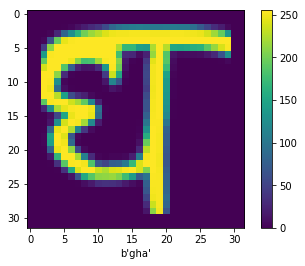

In [12]:
#to find the character name by it's label
def charactername(dic,label):
    for key, value in dic.items():    # for name, age in list.items():  (for Python 3.x)
        if(value == label):
            return (key)
print("Y shape",Y.shape)
print("X shape",X.shape)
#To print a random image and it's label from trainig set
rand = np.random.randint(1,100)
plt.figure()
plt.imshow(x_train[rand])
plt.colorbar()
plt.gca().grid(False)
plt.xlabel(charactername(Yclass,y_train[rand]))

/Users/vivanksharma/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


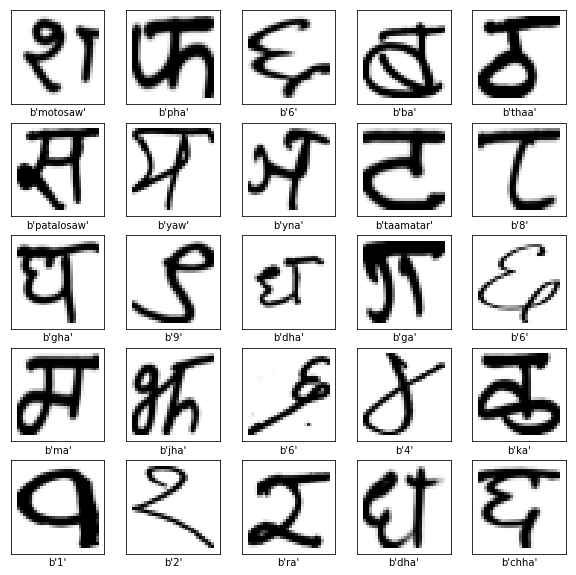

In [13]:
"""let's plot 25 random train set images """
plt.figure(figsize=(10,10))
rand = np.random.randint(1,1000,25)
for i in range(len(rand)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(x_train[rand[i]], cmap=plt.cm.binary)
    plt.xlabel(charactername(Yclass,y_train[rand[i]]))

In [14]:
#Let's normalise the feature matrix 
"""The value of feature matrix are in range 0 - 255"""
x_train = (x_train-np.mean(x_train))/np.std(x_train)
x_test = (x_test-np.mean(x_test))/np.std(x_test)

In [15]:
"""Let's train our model using three models ##first model has two layers only 
Second model has two layers with middle layer having 128 nodes
And third model has three layers with second layer having 256 nodes, Third layer with 128 nodes
Final layer in each model has 46 nodes as there are 36 alphabet and 10 digits in our data
We are doing this to find whether accuracy increases or decreases with addition of layers"""
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(46, activation=tf.nn.softmax)
])

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(46, activation=tf.nn.softmax)
])


model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(46, activation=tf.nn.softmax)
])
modellist = {'model1':model1,'model2':model2,'model3':model3}

In [16]:
"""Compiling our models"""
for k in modellist:
    modellist[k].compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
"""To note the value of epochs in corresponding model and train and test accuracy with that given model and epochs"""
epo = {'model1':[],'model2':[],'model3':[]}
trainacc = {'model1':[],'model2':[],'model3':[]}
testacc = {'model1':[],'model2':[],'model3':[]}
def trainandaccuracy(epochs,model,i):
    print("--"*20)
    print(i,epochs)
    model.fit(x_train,y_train, epochs=epochs)
    test_loss, test_acc = model.evaluate(x_test,y_test)
    train_loss, train_acc = model.evaluate(x_train,y_train)
    epo[i].append(epochs)
    trainacc[i].append(train_acc)
    testacc[i].append(test_acc)

In [ ]:
"""To train models with epochs 550  with all the three model we have created"""
for i in modellist:
    trainandaccuracy(500,modellist[i],i)

----------------------------------------
model1 500
Epoch 1/500
54740/54740 [==============================] - 8s 150us/step - loss: 1.3449 - acc: 0.6404
Epoch 2/500
54740/54740 [==============================] - 8s 139us/step - loss: 1.0916 - acc: 0.7061
Epoch 3/500
54740/54740 [==============================] - 8s 138us/step - loss: 1.0480 - acc: 0.7177
Epoch 4/500
54740/54740 [==============================] - 8s 139us/step - loss: 1.0167 - acc: 0.7288
Epoch 5/500
54740/54740 [==============================] - 7s 131us/step - loss: 1.0008 - acc: 0.7316
Epoch 6/500
54740/54740 [==============================] - 7s 131us/step - loss: 0.9832 - acc: 0.7364
Epoch 7/500
54740/54740 [==============================] - 8s 144us/step - loss: 0.9749 - acc: 0.7377
Epoch 8/500
54740/54740 [==============================] - 7s 134us/step - loss: 0.9617 - acc: 0.7408
Epoch 9/500
54740/54740 [==============================] - 7s 137us/step - loss: 0.9508 - acc: 0.7420
Epoch 10/500
54740/54740 [====

54740/54740 [==============================] - 8s 144us/step - loss: 0.7949 - acc: 0.7838
Epoch 81/500
54740/54740 [==============================] - 8s 142us/step - loss: 0.7971 - acc: 0.7832
Epoch 82/500
54740/54740 [==============================] - 8s 138us/step - loss: 0.7965 - acc: 0.7834
Epoch 83/500
54740/54740 [==============================] - 8s 141us/step - loss: 0.7950 - acc: 0.7830
Epoch 84/500
54740/54740 [==============================] - 8s 143us/step - loss: 0.7941 - acc: 0.7846
Epoch 85/500
54740/54740 [==============================] - 8s 141us/step - loss: 0.7939 - acc: 0.7834
Epoch 86/500
54740/54740 [==============================] - 8s 144us/step - loss: 0.7950 - acc: 0.7835
Epoch 87/500
54740/54740 [==============================] - 8s 147us/step - loss: 0.7924 - acc: 0.7836
Epoch 88/500
54740/54740 [==============================] - 7s 135us/step - loss: 0.7897 - acc: 0.7840
Epoch 89/500
54740/54740 [==============================] - 9s 156us/step - loss: 0.79

54740/54740 [==============================] - 10s 174us/step - loss: 0.7563 - acc: 0.7930
Epoch 159/500
54740/54740 [==============================] - 9s 165us/step - loss: 0.7552 - acc: 0.7949
Epoch 160/500
54740/54740 [==============================] - 10s 176us/step - loss: 0.7573 - acc: 0.7934
Epoch 161/500
54740/54740 [==============================] - 8s 155us/step - loss: 0.7589 - acc: 0.7910
Epoch 162/500
54740/54740 [==============================] - 9s 165us/step - loss: 0.7559 - acc: 0.7918
Epoch 163/500
54740/54740 [==============================] - 10s 176us/step - loss: 0.7540 - acc: 0.7931
Epoch 164/500
54740/54740 [==============================] - 8s 141us/step - loss: 0.7553 - acc: 0.7932
Epoch 165/500
54740/54740 [==============================] - 9s 168us/step - loss: 0.7548 - acc: 0.7934
Epoch 166/500
54740/54740 [==============================] - 10s 182us/step - loss: 0.7564 - acc: 0.7919
Epoch 167/500
54740/54740 [==============================] - 9s 163us/step

54740/54740 [==============================] - 8s 150us/step - loss: 0.7374 - acc: 0.7969
Epoch 237/500
54740/54740 [==============================] - 8s 145us/step - loss: 0.7325 - acc: 0.7997
Epoch 238/500
54740/54740 [==============================] - 8s 151us/step - loss: 0.7346 - acc: 0.7996
Epoch 239/500
54740/54740 [==============================] - 8s 137us/step - loss: 0.7343 - acc: 0.7983
Epoch 240/500
54740/54740 [==============================] - 8s 151us/step - loss: 0.7382 - acc: 0.7981
Epoch 241/500
54740/54740 [==============================] - 8s 138us/step - loss: 0.7326 - acc: 0.7979
Epoch 242/500
54740/54740 [==============================] - 8s 146us/step - loss: 0.7335 - acc: 0.8008
Epoch 243/500
54740/54740 [==============================] - 8s 150us/step - loss: 0.7368 - acc: 0.7985
Epoch 244/500
54740/54740 [==============================] - 8s 140us/step - loss: 0.7336 - acc: 0.7987
Epoch 245/500
54740/54740 [==============================] - 8s 150us/step - l

54740/54740 [==============================] - 8s 140us/step - loss: 0.7204 - acc: 0.8022
Epoch 315/500
54740/54740 [==============================] - 8s 153us/step - loss: 0.7200 - acc: 0.8027
Epoch 316/500
54740/54740 [==============================] - 8s 145us/step - loss: 0.7222 - acc: 0.8033
Epoch 317/500
54740/54740 [==============================] - 8s 140us/step - loss: 0.7202 - acc: 0.8025
Epoch 318/500
54740/54740 [==============================] - 8s 140us/step - loss: 0.7224 - acc: 0.8008
Epoch 319/500
54740/54740 [==============================] - 8s 150us/step - loss: 0.7203 - acc: 0.8036
Epoch 320/500
54740/54740 [==============================] - 8s 137us/step - loss: 0.7186 - acc: 0.8023
Epoch 321/500
54740/54740 [==============================] - 7s 135us/step - loss: 0.7252 - acc: 0.8014
Epoch 322/500
54740/54740 [==============================] - 8s 141us/step - loss: 0.7207 - acc: 0.8015
Epoch 323/500
54740/54740 [==============================] - 7s 133us/step - l

54740/54740 [==============================] - 8s 140us/step - loss: 0.7151 - acc: 0.8035
Epoch 393/500
54740/54740 [==============================] - 8s 142us/step - loss: 0.7099 - acc: 0.8053
Epoch 394/500
54740/54740 [==============================] - 8s 137us/step - loss: 0.7110 - acc: 0.8048
Epoch 395/500
54740/54740 [==============================] - 8s 146us/step - loss: 0.7116 - acc: 0.8035
Epoch 396/500
54740/54740 [==============================] - 8s 142us/step - loss: 0.7136 - acc: 0.8047
Epoch 397/500
54740/54740 [==============================] - 7s 135us/step - loss: 0.7125 - acc: 0.8047
Epoch 398/500
54740/54740 [==============================] - 8s 142us/step - loss: 0.7093 - acc: 0.8067
Epoch 399/500
54740/54740 [==============================] - 8s 140us/step - loss: 0.7129 - acc: 0.8069
Epoch 400/500
54740/54740 [==============================] - 7s 134us/step - loss: 0.7101 - acc: 0.8064
Epoch 401/500
54740/54740 [==============================] - 8s 154us/step - l